In [ ]:

import numpy as np
import torch
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
from keras.layers import Conv2D, Dropout, Flatten, MaxPool2D, Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [ ]:

!pip install -q kaggle

from google.colab import files
files.upload()
# Chọn file kaggle.json tải về ở bước 2 để tải lên

!mkdir '/root/.kaggle'
!cp kaggle.json '/root/.kaggle'
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

 70% 33.0M/47.0M [00:00<00:00, 159MB/s] 
100% 47.0M/47.0M [00:00<00:00, 94.4MB/s]


In [ ]:
! unzip -q /content/shoe-vs-sandal-vs-boot-dataset-15k-images.zip

In [ ]:
base_dir =  '/content/Shoe vs Sandal vs Boot Dataset'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2, 
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size= 32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size= 32,
    class_mode='categorical',
    subset='validation')
     

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


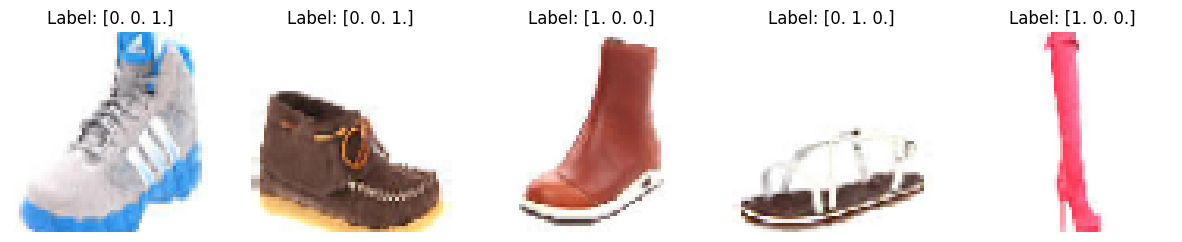

In [ ]:
import matplotlib.pyplot as plt

# Lấy một batch dữ liệu từ train_generator
batch_images, batch_labels = next(train_generator)

# Hiển thị 5 ảnh từ batch đó
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(batch_images[i])
    axes[i].set_title(f"Label: {batch_labels[i]}")
    axes[i].axis('off')

plt.show()

In [ ]:
import numpy as np
A = torch.rand(3,4)
print(A)
print(A[0])   

tensor([[0.3802, 0.9553, 0.7991, 0.5573],
        [0.7236, 0.1425, 0.7355, 0.5816],
        [0.2657, 0.4672, 0.8497, 0.2083]])
tensor([0.3802, 0.9553, 0.7991, 0.5573])


In [ ]:
labels = ()
labels = dict((v , k) for k , v in labels.items())
print(labels)

In [ ]:
from keras.applications import ResNet50


base_model = ResNet50(input_shape=(64, 64, 3),
                      include_top = False,
                      weights ="imagenet")
base_model.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model = Sequential()
model.add(base_model)
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(126, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 2048)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 126)               258174    
                                                                 
 dropout (Dropout)           (None, 126)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 381       
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
H = model.fit(train_generator, epochs=10, validation_data=validation_generator,
          steps_per_epoch = 3700//32, 
          validation_steps = 897//32)

Epoch 1/10
115/115 [==============================] - 64s 533ms/step - loss: 0.8964 - accuracy: 0.5668 - val_loss: 0.7145 - val_accuracy: 0.6875
Epoch 2/10
115/115 [==============================] - 50s 437ms/step - loss: 0.7146 - accuracy: 0.6701 - val_loss: 0.6198 - val_accuracy: 0.7333
Epoch 3/10
115/115 [==============================] - 49s 423ms/step - loss: 0.6551 - accuracy: 0.7041 - val_loss: 0.5580 - val_accuracy: 0.7667
Epoch 4/10
115/115 [==============================] - 48s 419ms/step - loss: 0.6097 - accuracy: 0.7250 - val_loss: 0.5599 - val_accuracy: 0.7411
Epoch 5/10
115/115 [==============================] - 48s 418ms/step - loss: 0.5901 - accuracy: 0.7451 - val_loss: 0.4956 - val_accuracy: 0.7958
Epoch 6/10
115/115 [==============================] - 49s 428ms/step - loss: 0.5623 - accuracy: 0.7476 - val_loss: 0.5375 - val_accuracy: 0.7746
Epoch 7/10
115/115 [==============================] - 48s 421ms/step - loss: 0.5435 - accuracy: 0.7568 - val_loss: 0.4778 - val_ac

In [ ]:
# test
from tqdm.notebook import tqdm
import cv2

image_1 = cv2.imread('/content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1).jpg')

# Resize
image = image_1.copy()
image = cv2.resize(image, dsize=(64, 64))
image = image.reshape(64, 64, 3)
# image = image.astype('float')*1./255
# Convert to tensor
image = np.expand_dims(image, axis=0)
class_name = ['boot', 'sandal', 'shoe']
# Predict
predict = model.predict(image)
# print("This picture is: ", class_name[np.argmax(predict[0])])
print(np.max(predict[0]))
if (np.max(predict)>=0.8) :
# Show image
    
    print(class_name[np.argmax(predict[0])])


1/1 [==============================] - 1s 769ms/step
0.9847506
shoe
